In [119]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab

from sci_analysis import analyze
from statsmodels.formula.api import ols
from scipy import stats

import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

import scipy.linalg
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D

In [120]:
def load_dataset(filename, group_name, group_value):
    df = pd.read_excel(filename).groupby(group_name).get_group(group_value)

    return df

In [121]:
def load_datasets(filename, df_1, df_2, df_3, group_name, group_value):
    df = pd.read_excel(filename)
    
    grouped_df = df.groupby(group_name)
    df = grouped_df.get_group(group_value)
    df = df.sort_values(df_2)
    
    X, y = df[[df_1, df_2]], df[df_3]

    return X, y

### Constants

In [122]:
filename = 'house01.xls'

y_name = 'TOTALEXP'
x1_name = 'TOTALRES'
x2_name = 'STOTAL'

r_name = 'COD_OBL'
r_value = 'Lviv'

In [123]:
df = load_dataset(filename, r_name, r_value)

In [124]:
corr = df[list([y_name, x1_name, x2_name])].corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,TOTALEXP,TOTALRES,STOTAL
TOTALEXP,1,0.794295,0.218138
TOTALRES,0.794295,1,0.317992
STOTAL,0.218138,0.317992,1


In [125]:
X, y = load_datasets(filename, x1_name, x2_name, y_name, r_name, r_value)

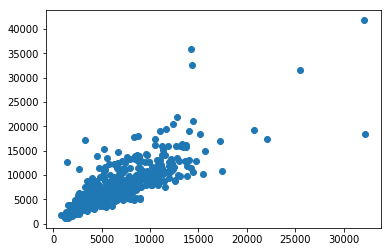

In [126]:
x1 = X[x1_name]

_ = plt.scatter(x1, y)

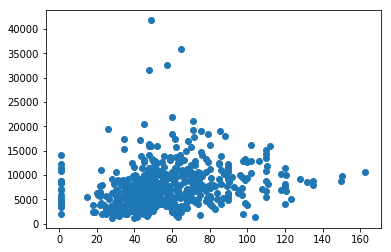

In [127]:
x2 = X[x2_name]

_ = plt.scatter(x2, y)

In [128]:
statistics_1, p_value_1 = stats.stats.pearsonr(x1, y)

print('statistics_1 =', statistics_1)
print('p_value =', p_value_1)
print()

statistics_2, p_value_2 = stats.stats.pearsonr(x2, y)

print('statistics_2 =', statistics_2)
print('p_value =', p_value_2)

statistics_1 = 0.7942945845574231
p_value = 7.632715647229527e-115

statistics_2 = 0.2181380360518438
p_value = 4.7166581248089056e-07


In [129]:
model = LinearRegression()

xx = np.array(X)
yy = xx.T[0] + xx.T[1]

model.fit(xx, yy)

score = model.score(xx, yy)
    
print('intercept: b_0 =', model.intercept_) 
print('slope: b_1 =', model.coef_)
print('score: R^2 =', score)

y_pred = model.predict(xx)

result = pd.DataFrame({'Actual': yy, 'Predicted': y_pred})

intercept: b_0 = -1.8189894035458565e-12
slope: b_1 = [1. 1.]
score: R^2 = 1.0


In [130]:
model = LinearRegression()

xx = np.array(x2)
yy = xx**2*y

model.fit(xx.reshape(-1, 1), yy)

score = model.score(xx.reshape(-1, 1), yy)
    
print('intercept: b_0 =', model.intercept_) 
print('slope: b_1 =', model.coef_)
print('score: R^2 =', score)

intercept: b_0 = -37110292.58935148
slope: b_1 = [1237958.59042025]
score: R^2 = 0.6750728929944529


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [132]:
model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

print('intercept: b_0 =', model.intercept_) 
print('slope: b_1 =', model.coef_)
print('score: R^2 =', score)

intercept: b_0 = 1838.197053336493
slope: b_1 = [ 0.95478577 -6.11199664]
score: R^2 = 0.6376262864937714


In [149]:
eps = y_train - model.coef_[0] * X_train[:, 0] - model.coef_[1] * X_train[:, 1] - model.intercept_

In [150]:
alpha = 0.05

print('alpha =', alpha)
print()

statistics, pvalue = stats.kstest(eps, 'norm')

print('statistics =', statistics)
print('pvalue =', pvalue)

alpha = 0.05

statistics = 0.6052631578947368
pvalue = 0.0


In [184]:
model = LinearRegression()

X_train_log = np.log(X_train)
y_train_log = np.log(y_train)

model.fit(X_train_log, y_train_log)

score = model.score(X_train_log, y_train_log)

print('intercept: b_0 =', model.intercept_) 
print('slope: b_1 =', model.coef_)
print('score: R^2 =', score)

intercept: b_0 = 1.9890683689653637
slope: b_1 = [ 0.79655297 -0.01401397]
score: R^2 = 0.7112327119280276


In [204]:
eps_log = np.log(y_train_log) - model.coef_[0] * np.log(X_train_log[:, 0]) - model.coef_[1] * np.log(X_train_log[:, 0]) - model.intercept_

In [203]:
alpha = 0.05

print('alpha =', alpha)
print()

statistics, pvalue = stats.kstest(eps, 'norm')

print('statistics =', statistics)
print('pvalue =', pvalue)

alpha = 0.05

statistics = 1.0
pvalue = 0.0


alpha = 0.05

statistics = 0.5502392344497608
pvalue = 0.0


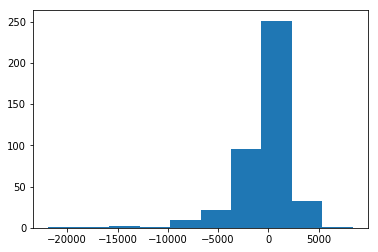

In [218]:
y_pred = np.exp(model.intercept_) * X_train[:,0] ** model.coef_[0] * X_train[:,1] ** model.coef_[1]

#y_pred = model.coef_[0] * X_train_log[:, 0] + model.coef_[1] * np.log(X_train_log[:, 0]) + model.intercept_

eps = y_pred-y_train

alpha = 0.05

print('alpha =', alpha)
print()

statistics, pvalue = stats.kstest(eps, 'norm')

print('statistics =', statistics)
print('pvalue =', pvalue)

result = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})

result.head(10)

_ = plt.hist(eps)

intercept: b_0 = 1838.197053336493
slope: b_1 = [ 0.95478577 -6.11199664]
score: R^2 = 0.6376262864937714


array([8255884.34591265])

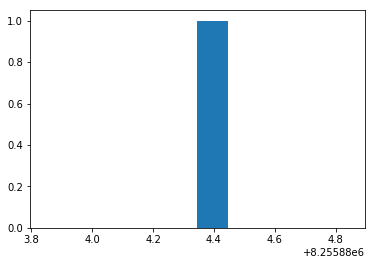

In [134]:
model = LinearRegression()

x0 = X_train
y0 = y_train

model.fit(x0, y0)

score = model.score(x0, y0)

print('intercept: b_0 =', model.intercept_) 
print('slope: b_1 =', model.coef_)
print('score: R^2 =', score)

y_pred = model.predict(X_train)

result = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})

a = sklearn.metrics.mean_squared_error(y_train, y_pred, multioutput='raw_values')
_ = plt.hist(a)
a

In [195]:
from __future__ import print_function
import statsmodels.api as sm
import statsmodels.formula.api as smf

def log(x):
    return np.log(x)

formula = 'log(TOTALEXP) ~ log(TOTALRES) + log(STOTAL)'

mod1 = smf.glm(formula=formula, data=df[['TOTALEXP', 'TOTALRES', 'STOTAL']]).fit()
print(mod1.summary())

y_pred = mod1.params['Intercept'] + X_train[:,0] * mod1.params['log(TOTALRES)'] + X_train[:,1] * mod1.params['log(STOTAL)']

result = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})

result.head(10)

                 Generalized Linear Model Regression Results                  
Dep. Variable:          log(TOTALEXP)   No. Observations:                  523
Model:                            GLM   Df Residuals:                      520
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.093792
Method:                          IRLS   Log-Likelihood:                -121.72
Date:                Wed, 01 Dec 2021   Deviance:                       48.772
Time:                        22:12:14   Pearson chi2:                     48.8
No. Iterations:                     3   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9188      0.195      9.840      0.000       1.537       2.301
log(TOTALRES)     0.8059      0.023     35.

,Actual,Predicted
0,4399.680,8.029659
1,8090.125,8.669640
2,7221.025,8.631529
3,6010.010,8.360442
4,4842.245,7.874531
5,11259.670,8.676853
6,7306.910,8.418159
7,6373.335,8.031910
8,7352.560,8.695340
9,10157.035,9.431929


In [193]:
eps = np.abs(y_pred - y_train)

alpha = 0.05

print('alpha =', alpha)
print()

statistics, pvalue = stats.kstest(eps, 'norm')

print('statistics =', statistics)
print('pvalue =', pvalue)

alpha = 0.05

statistics = 1.0
pvalue = 0.0


In [ ]:
def sigmoid(x1, a, b):
    y = a + b*np.sin(x1)
    
    return y

In [ ]:
popt, pcov = curve_fit(sigmoid, x2, y)

print(popt)
print(pcov)

In [ ]:
Y_pred = sigmoid(x2, popt[0], popt[1])

#plot initial prediction against datapoints
plt.plot(x2, Y_pred)
plt.plot(x2, y, 'ro')

In [ ]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16


def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def func(data, a, alpha, beta):
    x1 = data[0]
    x2 = data[1]

    return a + alpha * x1 + x2 / (beta * x2)


if __name__ == "__main__":
    xData = X_train[:, 0]
    yData = X_train[:, 1]
    zData = y_train

    data = [xData, yData, zData]

    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, pcov = scipy.optimize.curve_fit(func, [xData, yData], zData)

    #ScatterPlot(data)
    #SurfacePlot(func, data, fittedParameters)
    #ContourPlot(func, data, fittedParameters)

    print('fitted prameters', fittedParameters)

    modelPredictions = func(data, *fittedParameters) 

    absError = modelPredictions - zData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(zData))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)